## Explore overlaps

In this notebook we run simrecon and save the overlaps.  

$ \tilde{D}_m(\mathbf{k} + m \mathbf{p})O_0(\mathbf{k}) $  
$ \tilde{D}_m(\mathbf{k})O_0(  \mathbf{k} + m \mathbf{p} ) $


In [1]:
import mrc as Mrc
import numpy as np
from tnia.plotting.projections import show_xyz_slice, show_xyz_max
import os
import sys 
import matplotlib.pyplot as plt

computer = 'bnort'

if computer == 'default':
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks')
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks\Scripts')
elif computer == 'bnort':
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts\Scripts')
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts')
else:
    pass

from simrecon_utils import simrecon

In [2]:
test_set_num = 2 

if test_set_num == 0:

    home = r'D:\Janelia\Data 2024-06-12'
    input_name = os.path.join(home, r'rois_0\roi_256.mrc')
    otf_name = os.path.join(home, r'561nm OTF used\560 201909_19-20_best.mrc')
    output_name = os.path.join(home, r'temp\temp_.mrc')
    overlap_name = os.path.join(home, r'temp\try_again.mrc')
    #overlap_name = os.path.join(home, r'temp\from_c.mrc')
elif test_set_num == 1:

    home = r'D:\Janelia\cudasirecon_test_data'
    input_name = os.path.join(home, r'raw.dv')
    otf_name = os.path.join(home, r'otf.dv')
    output_name = os.path.join(home, r'out.dv')
    overlap_name = os.path.join(home, r'overlap.dv')

elif test_set_num == 2:
    home = r'D:\Janelia\Data 2024-06-12'
    input_name = os.path.join(home, r'data\561nm WF correlation image 2_20240521_162301\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1.mrc')
    otf_name = os.path.join(home, r'561nm OTF used\560 201909_19-20_best.mrc')
    output_name = os.path.join(home, r'temp\temp_full.mrc')
    overlap_name = os.path.join(home, r'temp\overlaps_full.mrc')
elif test_set_num == 3:
    home = r'D:\Janelia\Data 2024-06-10'
    input_name = os.path.join(home, r'Brian test\561nm cells after Lc correct polarisation parameter test\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1.mrc')
    otf_name = os.path.join(r'D:\Janelia\Data 2024-06-12', r'561nm OTF used\560 201909_19-20_best.mrc')
    output_name = os.path.join(home, r'temp\temp_full.mrc')
    overlap_name = os.path.join(home, r'temp\overlaps_full.mrc')
 

In [3]:
sim_kwargs = dict(
                    nphases=5,
                    ndirs=3,
                    angle0= 1.29,
                    negDangle=True,
                    ls= 0.3456790123456790,              
                    na= 0.85,
                    nimm= 1.0,
                    zoomfact= 2.0, 
                    background= 100.0,           
                    wiener= 0.007,
                    fastSIM=True,
                    otfRA= True,
                    dampenOrder0=True,
                    k0searchall=True,
                    equalizez=True,
                    preciseapo=True,
                    gammaApo=0.3,
                    suppressR=15,
                    nthreads = 8,
                    input_file= input_name,
                    output_file = output_name, 
                    otf_file = otf_name,
                    saveoverlaps = overlap_name
                )          

'\n     "D:\\Janelia\\Data 2024-06-12\\rois_0\\roi_128.mrc",\n                "D:\\Janelia\\Data 2024-06-12\\rois_0\\roi_128_proc_gApo_0.3_supR_10_w_0.001.mrc",\n                "D:\\Janelia\\Data 2024-06-12\\561nm OTF used\\560 201909_19-20_best.mrc",\n                "-nphases","5",\n                "-ndirs","3",\n                "-fastSIM",\n                "-gammaApo",\n                "0.2000000000000000",\n                "-preciseapo",\n                "-zoomfact",\n                "2.0000000000000000",\n                "-suppressR",\n                "1.5000000000000000",\n                "-dampenOrder0",\n                "-equalizez",\n                "-wiener",\n                "0.0070000000000000",\n                "-background",\n                "100.0000000000000000",\n                "-otfRA",\n                "-angle0",\n                "1.2900000000000000",\n                "-negDangle",\n                "-ls",\n                "0.3456790123456790",\n                "-na

In [4]:
sim_output = simrecon(**sim_kwargs)

In [5]:
overlap = Mrc.Mrc(overlap_name)
overlap= overlap.data
print(overlap.shape, overlap.dtype)
print(overlap.min(), overlap.max())

(195, 2, 1024, 1024) >c8
(-141.65927+12.536678j) (139.28922+16.587282j)


In [6]:
dirs = 3
orders = 2
nz = int(overlap.shape[0]/dirs)
ny = overlap.shape[2]
nx = overlap.shape[3]
print(nz, ny, nx)

65 1024 1024


(65, 1024, 1024)
4.5841442e-10 1709.3391


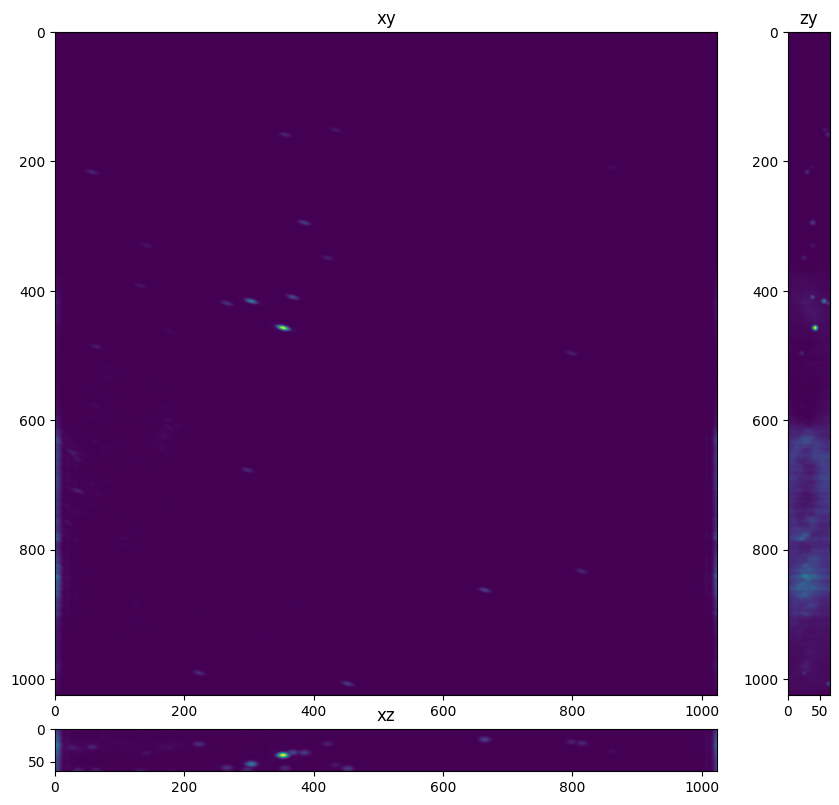

In [7]:
dir = 1
order = 0  
overlap1 = overlap[dir*nz:(dir+1)*nz, order, :, :]
print(overlap1.shape)

overlap1 = np.abs(overlap1)**2
print(overlap1.min(), overlap1.max())
#overlap1 = np.log(overlap1)

zc, yc, xc = overlap1.shape[0]//2, overlap1.shape[1]//2, overlap1.shape[2]//2
#fig = show_xyz_slice(overlap1, 0, 0, 0)
fig = show_xyz_max(overlap1)


In [9]:
import numpy as np

fft_overlaps = []

fft_overlaps = np.zeros((dirs, orders, nz, ny, nx))

for dir in range(dirs):
    for order in range(orders):
        overlap1 = overlap[dir*nz:(dir+1)*nz, order, :, :]
        overlap1 = np.abs(overlap1)**2
        fft_overlap = np.fft.fftn(overlap1)
        fft_overlap = np.fft.fftshift(fft_overlap)
        fft_overlap = np.abs(fft_overlap)**2
        #fft_overlap = np.log(fft_overlap)
        fft_overlaps[dir, order, :, :, :] = fft_overlap

        #fig = show_xyz_max(fft_overlap)    

In [16]:
print(nz)
print(overlap.shape)

32
(96, 2, 1024, 1024)


In [10]:
import napari
viewer = napari.Viewer()
#viewer.add_image(fft_overlap0)
#viewer.add_image(fft_overlaps)
overlap_abs = np.abs(overlap)**2
viewer.add_image(overlap_abs)

ModuleNotFoundError: No module named 'napari'

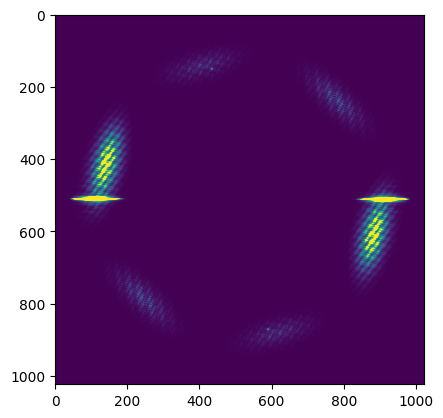

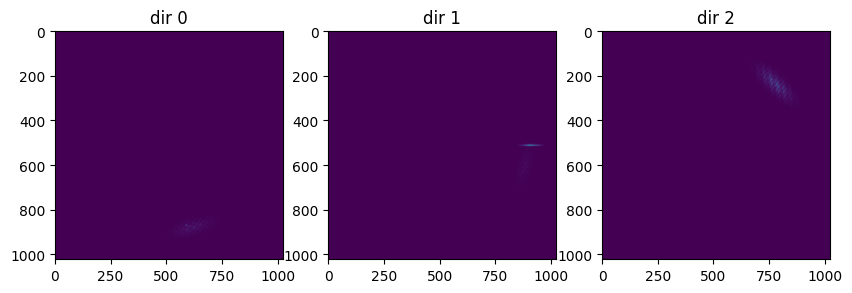

In [9]:
from tnia.plotting.plt_helper import imshow_multi2d


crosscors = []

for dir in range(dirs):
    overlap0 = overlap[dir*nz:(dir+1)*nz, 0, :, :]
    overlap1 = overlap[dir*nz:(dir+1)*nz, 1, :, :]

    crosscor_c = np.zeros((ny,nx), overlap.dtype)

    for z in range(nz):
        crosscor_c = crosscor_c + overlap0[z]*np.conj(overlap1[z])

    crosscor = np.fft.fftn(crosscor_c)
    crosscor = np.fft.fftshift(crosscor)
    crosscor = np.abs(crosscor)**2
    crosscors.append(crosscor)

crosscors_arr = np.array(crosscors)
crosscors_arr = np.max(crosscors_arr, axis = 0)
temp = crosscors_arr[::-1,::-1]
crosscors_arr = crosscors_arr + temp

plt.imshow(crosscors_arr, vmax = crosscors_arr.max()/50)

fig = imshow_multi2d(crosscors, ['dir 0', 'dir 1', 'dir 2'], 1, 3)

In [10]:
for line in sim_output:
    print(line)

nphases=5, ndirs=3
nx=1024, ny=1024, nz=32, nwaves=1, ntimes=1
nzotf=65, dkzotf=0.061538, nxotf=65, nyotf=1, dkrotf=0.060096
Number of threads used: 8
Creating FFT plans...
Separation matrix:
  1.00000   1.00000   1.00000   1.00000   1.00000 
  1.00000   0.30902  -0.80902  -0.80902   0.30902 
  0.00000   0.95106   0.58779  -0.58779  -0.95106 
  1.00000  -0.80902   0.30902   0.30902  -0.80902 
  0.00000   0.58779  -0.95106   0.95106  -0.58779 

rdistcutoff = 2.905983 1/micron
k0guess[direction 0] = (0.400836, 1.389779) 1/micron
Initial guess by findk0() of k0[direction 0] = (0.289324,1.350253) 1/micron
before fitk0andmodamp
 In getmodamp: angle=1.359714, mag=1.380903, amp=0.677896, phase=1.477889
 In getmodamp: angle=1.360714, mag=1.380903, amp=0.706621, phase=1.236171
 In getmodamp: angle=1.361714, mag=1.380903, amp=0.371994, phase=0.953300
 In getmodamp: angle=1.360314, mag=1.380903, amp=0.746153, phase=1.331759
 In getmodamp: angle=1.360314, mag=1.381654, amp=0.655542, phase=1.326972

In [24]:
len(sim_output)

1

In [25]:
sim_output

['']